<a href="https://colab.research.google.com/github/kanjari26/MNIST-DIGIT-CLASSIFICATION-using-ANN/blob/main/MNIST_Digit_Classification_using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST HANDWRITTEN DIGIT CLASSIFICATION USING NEURAL NETWORK**


Importing the Dependencies


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

LOading the MNIST data from keras.dataset

In [ ]:
(x_train,y_train),(x_test , y_test) = mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [ ]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(x_train[10].shape)

(28, 28)


Training Data = 60,000

Test Data = 10,000


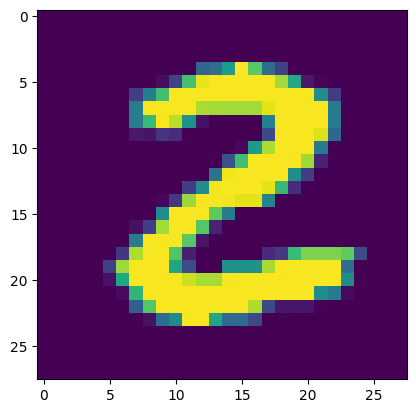

2


In [ ]:
# displaying the image

plt.imshow(x_train[25])
plt.show()

# print the corresponding label
print(y_train[25])

In [ ]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


Image Labels


In [ ]:
# unique values in Y_train
print(np.unique(y_train))

# unique values in Y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding


All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension


In [ ]:
# scaling the values

x_train = x_train/255
x_test = x_test/255

In [ ]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the model

In [ ]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(32, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10,validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2827 - accuracy: 0.9178 - val_loss: 0.1621 - val_accuracy: 0.9510
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1179 - accuracy: 0.9640 - val_loss: 0.1203 - val_accuracy: 0.9643
Epoch 3/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0815 - accuracy: 0.9743 - val_loss: 0.0984 - val_accuracy: 0.9695
Epoch 4/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0623 - accuracy: 0.9803 - val_loss: 0.1037 - val_accuracy: 0.9689
Epoch 5/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0475 - accuracy: 0.9851 - val_loss: 0.1053 - val_accuracy: 0.9677
Epoch 6/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0388 - accuracy: 0.9873 - val_loss: 0.0885 - val_accuracy: 0.9756
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0308 - accuracy: 0.9901 - val_loss: 0.1228 - val_acc

Model on Trainning Data gives 99.82%

**Accuracy on Test Data**

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0949 - accuracy: 0.9766
0.9765999913215637


The Test Data Accuracy is 97.9

In [ ]:
print(x_test.shape)

(10000, 28, 28)


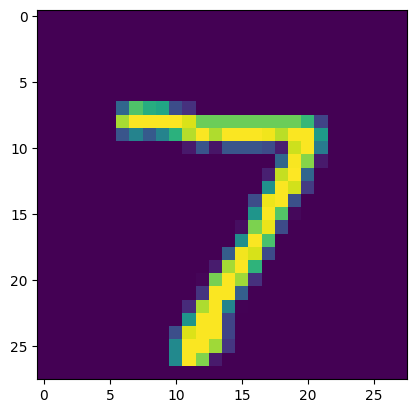

In [ ]:
# first data point in X_test
plt.imshow(x_test[0])
plt.show()

In [ ]:
print(y_test[0])

7


In [ ]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(y_pred.shape)

(10000, 10)


In [ ]:
print(y_pred[0])

[9.1427137e-11 6.4239718e-11 6.1929812e-09 2.4008204e-07 1.0299999e-17
 3.5821259e-12 1.1941789e-16 9.9999970e-01 7.5771111e-13 5.9755303e-09]


model.predict() gives the prediction probability of each class for that data point

In [ ]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
# converting the prediction probabilities to class label for all test data points_pred_labels = [np.argmax(i) for i in Y_pred]
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted Labels

Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 971    0    2    1    0    0    1    2    2    1]
 [   0 1122    4    3    0    0    1    1    4    0]
 [   2    0 1007    2    3    0    2    3   12    1]
 [   0    0    6  987    0    6    0    2    8    1]
 [   0    0    3    0  964    0    3    1    2    9]
 [   2    0    0   17    1  852    4    3   11    2]
 [   1    2    0    1    3    1  946    0    4    0]
 [   0    3    9    0    1    1    0 1003    4    7]
 [   3    1    4    4    1    0    0    3  958    0]
 [   1    4    2    6   12    6    1    6   15  956]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

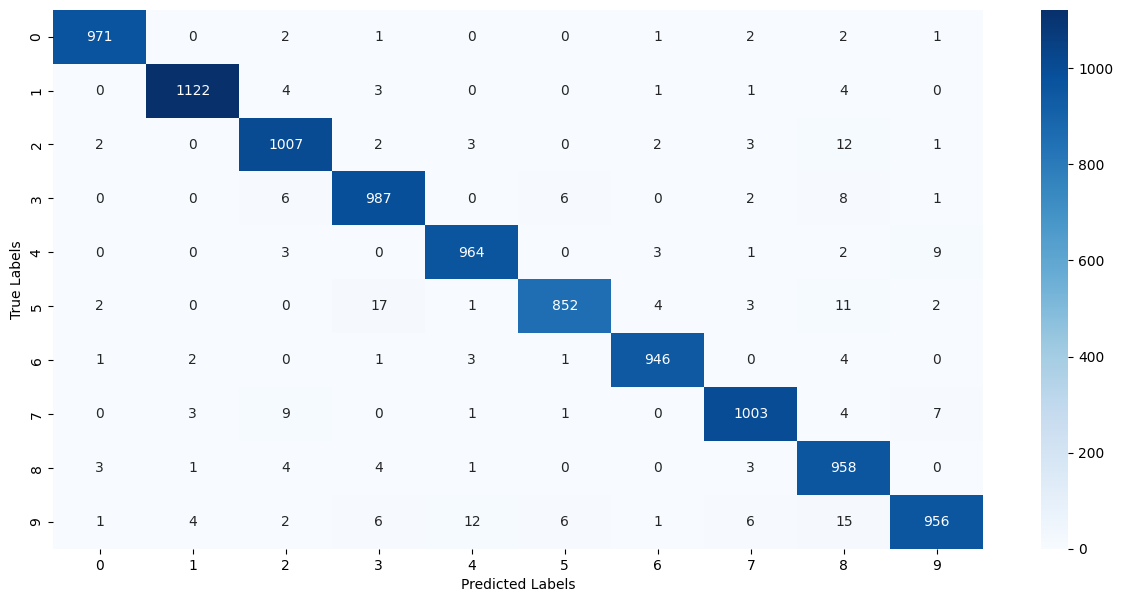

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Predictive System

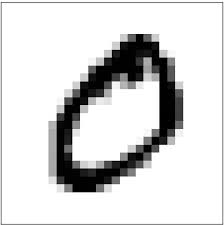

1/1 [==============================] - 0s 29ms/step
The Handwritten Digit is recognised as  6


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

In [ ]:
!wget 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ7wh99jK37LLbFXUC3HnjhKSAeE0JIQC2ISQUZHQnbIg&s'

--2024-04-18 06:50:43--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ7wh99jK37LLbFXUC3HnjhKSAeE0JIQC2ISQUZHQnbIg&s
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 142.251.107.102, 142.251.107.139, 142.251.107.101, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|142.251.107.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3718 (3.6K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcQ7wh99jK37LLbFXUC3HnjhKSAeE0JIQC2ISQUZHQnbIg&s’

images?q=tbn:ANd9Gc 100%[===================>]   3.63K  --.-KB/s    in 0s      

2024-04-18 06:50:43 (30.1 MB/s) - ‘images?q=tbn:ANd9GcQ7wh99jK37LLbFXUC3HnjhKSAeE0JIQC2ISQUZHQnbIg&s’ saved [3718/3718]



In [ ]:
!wget 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQggWxeq2d9UPTN2DUwCBcdUHuLTWcvZysHDAyr8nzn8Q&s'

--2024-04-18 06:50:44--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQggWxeq2d9UPTN2DUwCBcdUHuLTWcvZysHDAyr8nzn8Q&s
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 142.251.107.102, 142.251.107.139, 142.251.107.101, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|142.251.107.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2038 (2.0K) [image/png]
Saving to: ‘images?q=tbn:ANd9GcQggWxeq2d9UPTN2DUwCBcdUHuLTWcvZysHDAyr8nzn8Q&s’

images?q=tbn:ANd9Gc 100%[===================>]   1.99K  --.-KB/s    in 0s      

2024-04-18 06:50:44 (25.0 MB/s) - ‘images?q=tbn:ANd9GcQggWxeq2d9UPTN2DUwCBcdUHuLTWcvZysHDAyr8nzn8Q&s’ saved [2038/2038]



In [ ]:
!wget 'https://machinelearningmastery.com/wp-content/uploads/2019/02/sample_image.png'

--2024-04-18 06:50:44--  https://machinelearningmastery.com/wp-content/uploads/2019/02/sample_image.png
Resolving machinelearningmastery.com (machinelearningmastery.com)... 104.26.1.148, 104.26.0.148, 172.67.72.46, ...
Connecting to machinelearningmastery.com (machinelearningmastery.com)|104.26.1.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34970 (34K) [image/png]
Saving to: ‘sample_image.png’

sample_image.png    100%[===================>]  34.15K  --.-KB/s    in 0.001s  

2024-04-18 06:50:44 (56.2 MB/s) - ‘sample_image.png’ saved [34970/34970]

